#### Libraries

In [1]:
import pandas as pd
from pmdarima import auto_arima

#### Data

In [5]:
df = pd.read_csv("https://bit.ly/udemy_df",
           index_col="Date",
           parse_dates=True).asfreq("D")

df.head()

,Udemy,Easter,Christmas
Date,,,
2016-01-01,311,0,0
2016-01-02,564,0,0
2016-01-03,517,0,0
2016-01-04,652,0,0
2016-01-05,756,0,0


In [7]:
# training and test set
training = df.iloc[:-31, :]
test = df.iloc[-31:, :]

#### SARIMA model

In [8]:
# SARIMA model
model = auto_arima(y=training.Udemy,
                  m = 7)

In [11]:
# Predictions
predictions = pd.Series(model.predict(n_periods=len(test)))
predictions.index = test.index
predictions[:5]

Date
2020-12-01    2453.355211
2020-12-02    2312.499869
2020-12-03    2301.723604
2020-12-04    2290.399602
2020-12-05    1876.604128
Freq: D, dtype: float64

<Axes: xlabel='Date'>

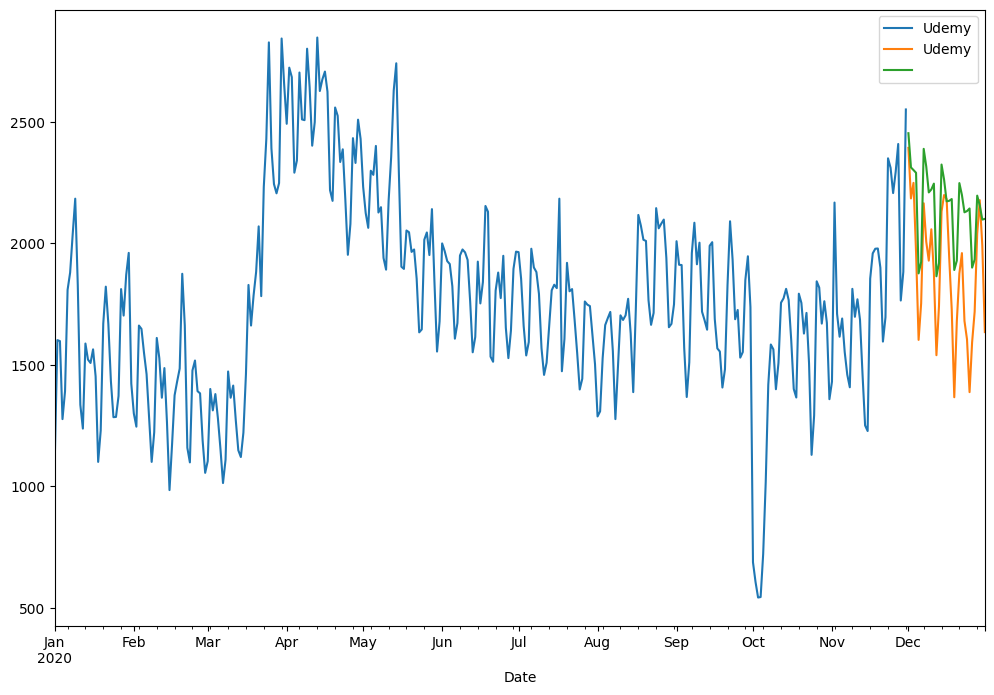

In [17]:
# Visualizations
training['Udemy']['2020-01-01':].plot(figsize=(12,8), legend=True)
test['Udemy'].plot(legend=True)
predictions.plot(legend=True)

1125